In [1]:
%matplotlib inline

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import STL, seasonal_decompose
from scipy.signal import periodogram
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GroupShuffleSplit

## Time Series
### Live Demo

In [9]:
bike_data = pd.read_csv('data/train.csv')

In [10]:
bike_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [11]:
bike_data.datetime = pd.to_datetime(bike_data.datetime)

In [12]:
bike_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [13]:
spring_bike = bike_data[
    (bike_data.datetime >= "2012-03-21") &
    (bike_data.datetime < '2012-06-22') 
]

In [14]:
winter_bile = bike_data[
    (bike_data.datetime >= "2011-12-22") &
    (bike_data.datetime < '2012-03-21') 
]

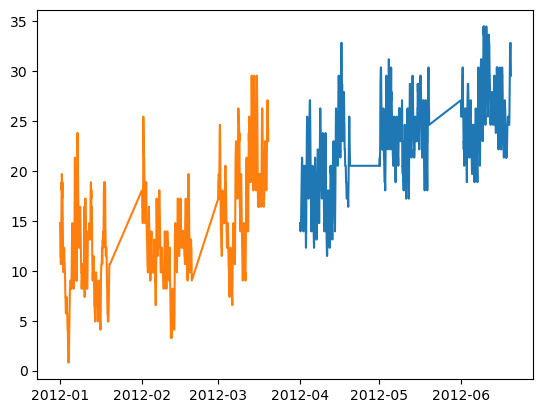

In [15]:
plt.plot(spring_bike.datetime, spring_bike.temp)
plt.plot(winter_bile.datetime, winter_bile.temp)
plt.show()

In [16]:
bike_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [17]:
bike_data.diff()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0 days 01:00:00,0.0,0.0,0.0,0.0,-0.82,-0.760,-1.0,0.0000,5.0,19.0,24.0
2,0 days 01:00:00,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0000,-3.0,-5.0,-8.0
3,0 days 01:00:00,0.0,0.0,0.0,0.0,0.82,0.760,-5.0,0.0000,-2.0,-17.0,-19.0
4,0 days 01:00:00,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0000,-3.0,-9.0,-12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0 days 01:00:00,0.0,0.0,0.0,0.0,0.00,0.000,0.0,2.0033,-16.0,-217.0,-233.0
10882,0 days 01:00:00,0.0,0.0,0.0,0.0,-0.82,-2.270,7.0,-11.0014,3.0,-98.0,-95.0
10883,0 days 01:00:00,0.0,0.0,0.0,0.0,-0.82,-1.515,4.0,0.0000,-6.0,-67.0,-73.0
10884,0 days 01:00:00,0.0,0.0,0.0,0.0,0.00,1.515,0.0,-8.9981,8.0,-47.0,-39.0


In [18]:
bike_data.shift()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-01 00:00:00,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0000,3.0,13.0,16.0
2,2011-01-01 01:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0000,8.0,32.0,40.0
3,2011-01-01 02:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0000,5.0,27.0,32.0
4,2011-01-01 03:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0000,3.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 18:00:00,4.0,0.0,1.0,1.0,15.58,19.695,50.0,23.9994,23.0,546.0,569.0
10882,2012-12-19 19:00:00,4.0,0.0,1.0,1.0,15.58,19.695,50.0,26.0027,7.0,329.0,336.0
10883,2012-12-19 20:00:00,4.0,0.0,1.0,1.0,14.76,17.425,57.0,15.0013,10.0,231.0,241.0
10884,2012-12-19 21:00:00,4.0,0.0,1.0,1.0,13.94,15.910,61.0,15.0013,4.0,164.0,168.0


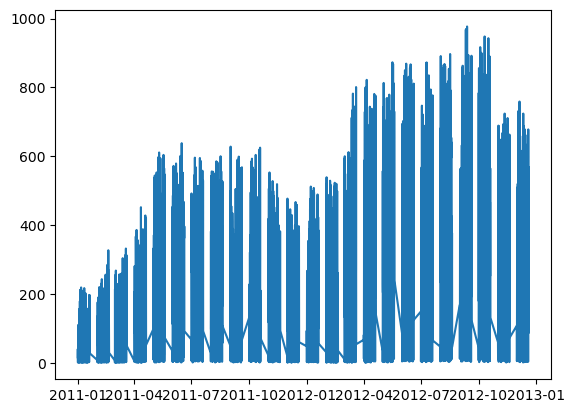

In [19]:
plt.plot(bike_data.datetime, bike_data['count'])
plt.show()

In [20]:
bike_data = bike_data.rename(columns={'count': 'num_rentals'})

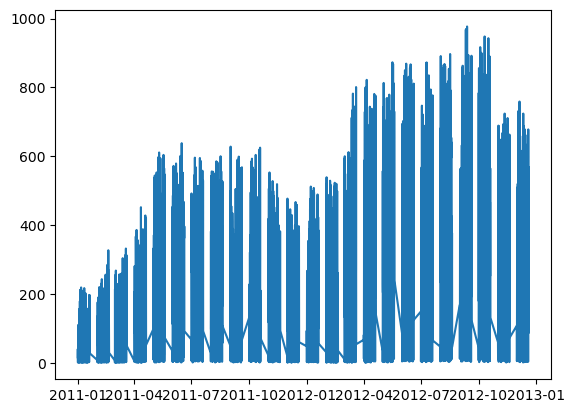

In [21]:
plt.plot(bike_data['datetime'], bike_data['num_rentals'])
plt.show()

In [22]:
STL(bike_data.num_rentals, period=24)

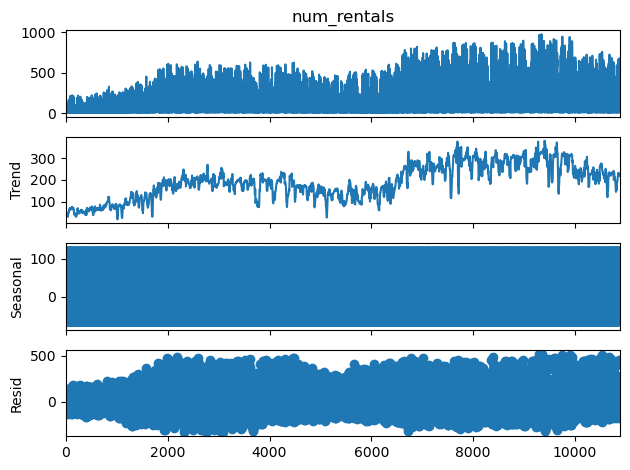

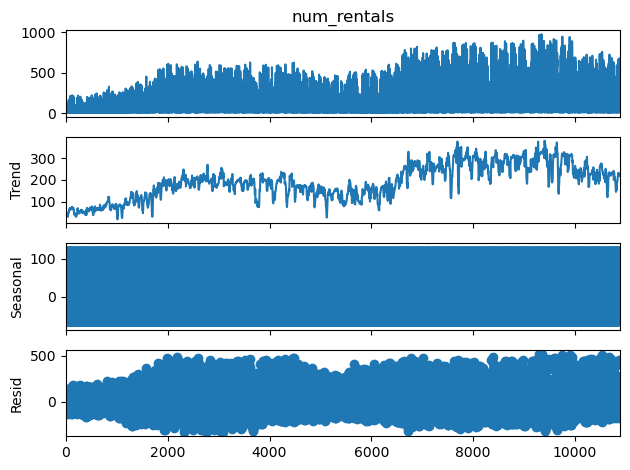

In [23]:
seasonal_decompose(bike_data.num_rentals, period=24).plot()

In [25]:
bike_data.num_rentals

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: num_rentals, Length: 10886, dtype: int64

In [28]:
bike_data.num_rentals.shift(-1).fillna(0)

0         40.0
1         32.0
2         13.0
3          1.0
4          1.0
         ...  
10881    241.0
10882    168.0
10883    129.0
10884     88.0
10885      0.0
Name: num_rentals, Length: 10886, dtype: float64

In [35]:
bike_data.num_rentals.corr(bike_data.num_rentals.shift(1).fillna(0))

np.float64(0.8420205011724475)

In [36]:
for shift in range(31):
    print(shift, bike_data.num_rentals.corr(bike_data.num_rentals.shift(shift).fillna(0)))

0 1.0
1 0.8420205011724475
2 0.5896860029119291
3 0.39824542645046673
4 0.26526659427994087
5 0.13766509181084133
6 0.0006128732075647533
7 -0.10456673331602104
8 -0.1252221403940918
9 -0.07131131202618371
10 -0.06867092191251395
11 -0.1254978931109341
12 -0.1607608398524033
13 -0.1354502753405399
14 -0.08340365533198395
15 -0.07518626244667498
16 -0.10249434717491746
17 -0.06807596055497178
18 0.03384812219359691
19 0.1563499851452658
20 0.2655221674831344
21 0.3735685979843817
22 0.5219540727485144
23 0.7068053174993717
24 0.8114745246534499
25 0.7032066047469978
26 0.5184478277239314
27 0.3758565502818818
28 0.27392303276328517
29 0.16903053420152783
30 0.04608954914342461


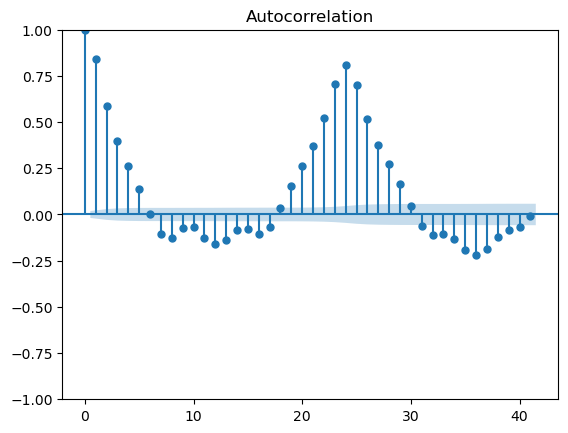

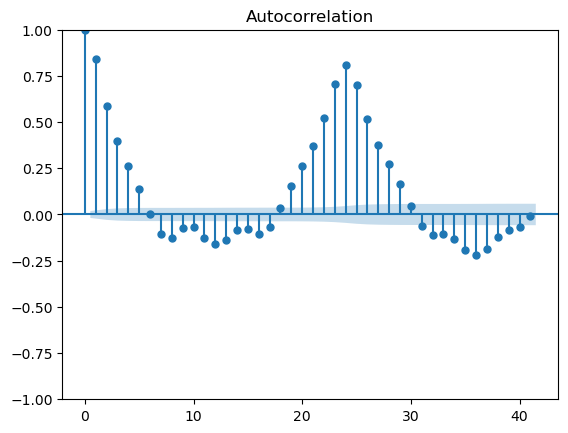

In [38]:
plot_acf(bike_data.num_rentals)

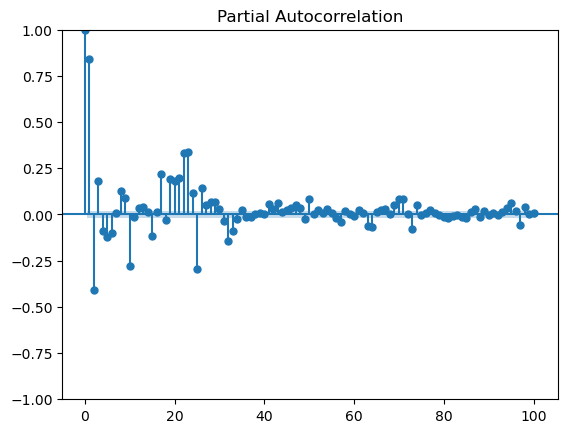

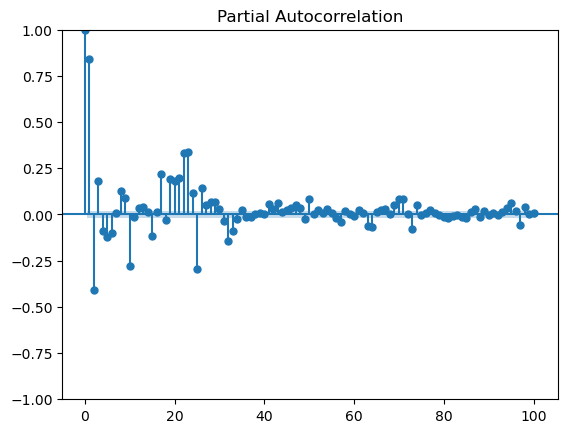

In [41]:
plot_pacf(bike_data.num_rentals, lags=100)

In [43]:
bike_data_2011 = bike_data[bike_data.datetime.dt.year == 2011]

In [47]:
attrs, tgt = bike_data_2011.drop(columns=['num_rentals', 'datetime']), bike_data_2011.num_rentals

In [48]:
model = RandomForestRegressor()
model.fit(attrs, tgt)

RandomForestRegressor()

In [49]:
attrs

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,1,0,0,1,9.84,14.395,81,0.0000,3,13
1,1,0,0,1,9.02,13.635,80,0.0000,8,32
2,1,0,0,1,9.02,13.635,80,0.0000,5,27
3,1,0,0,1,9.84,14.395,75,0.0000,3,10
4,1,0,0,1,9.84,14.395,75,0.0000,0,1
...,...,...,...,...,...,...,...,...,...,...
5417,4,0,1,2,14.76,17.425,53,11.0014,17,234
5418,4,0,1,1,16.40,20.455,40,11.0014,9,197
5419,4,0,1,2,14.76,17.425,53,8.9981,15,112
5420,4,0,1,2,14.76,17.425,57,11.0014,12,95


In [52]:
attrs_merged = attrs.merge(attrs.shift(1), left_index=True, right_index=True)

In [55]:
# this way only 2 colums are merged
attrs_merged.merge(attrs[['temp', 'atemp']].shift(2), left_index=True, right_index=True)

,season_x,holiday_x,workingday_x,weather_x,temp_x,atemp_x,humidity_x,windspeed_x,casual_x,registered_x,...,workingday_y,weather_y,temp_y,atemp_y,humidity_y,windspeed_y,casual_y,registered_y,temp,atemp
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,...,0.0,1.0,9.84,14.395,81.0,0.0000,3.0,13.0,NaN,NaN
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,...,0.0,1.0,9.02,13.635,80.0,0.0000,8.0,32.0,9.84,14.395
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,...,0.0,1.0,9.02,13.635,80.0,0.0000,5.0,27.0,9.02,13.635
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,...,0.0,1.0,9.84,14.395,75.0,0.0000,3.0,10.0,9.02,13.635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,4,0,1,2,14.76,17.425,53,11.0014,17,234,...,1.0,1.0,14.76,17.425,50.0,12.9980,11.0,343.0,15.58,19.695
5418,4,0,1,1,16.40,20.455,40,11.0014,9,197,...,1.0,2.0,14.76,17.425,53.0,11.0014,17.0,234.0,14.76,17.425
5419,4,0,1,2,14.76,17.425,53,8.9981,15,112,...,1.0,1.0,16.40,20.455,40.0,11.0014,9.0,197.0,14.76,17.425
5420,4,0,1,2,14.76,17.425,57,11.0014,12,95,...,1.0,2.0,14.76,17.425,53.0,8.9981,15.0,112.0,16.40,20.455


In [56]:
# chekc the importance using autocorrelation or pa

In [58]:
train_test_split(attrs_merged, tgt, shuffle=False)

[      season_x  holiday_x  workingday_x  weather_x  temp_x  atemp_x  \
 0            1          0             0          1    9.84   14.395   
 1            1          0             0          1    9.02   13.635   
 2            1          0             0          1    9.02   13.635   
 3            1          0             0          1    9.84   14.395   
 4            1          0             0          1    9.84   14.395   
 ...        ...        ...           ...        ...     ...      ...   
 4061         4          0             0          1   17.22   21.210   
 4062         4          0             0          3   17.22   21.210   
 4063         4          0             0          2   16.40   20.455   
 4064         4          0             0          3   16.40   20.455   
 4065         4          0             0          3   16.40   20.455   
 
       humidity_x  windspeed_x  casual_x  registered_x  season_y  holiday_y  \
 0             81       0.0000         3            13 

In [4]:
import tensorflow

ModuleNotFoundError: No module named 'tensorflow'